In [1]:
%matplotlib inline 
import re
import glob
import pickle
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## TICA-based MSM

In [2]:
tica_msm_lag = []
tica_tica_lag = []
tica_n_split = []
tica_n_dims = []
tica_labels = []
tica_train_scores = []
tica_test_scores = []
tica_tica_timescales = []
tica_msm_timescales = []

In [3]:
tica_files = glob.glob('tica_msm_scores_lag_100_k_10*.pkl')

In [4]:
for file in tica_files:
    match = re.match('tica_msm_scores_lag_([0-9]+)_k_([0-9]+)_components_([0-9]+)_tlag_([0-9]+).pkl', file)
    if match:
        groups = match.groups()
        tica_msm_lag.append(int(groups[0]))
        tica_n_split.append(int(groups[1]))
        tica_n_dims.append(int(groups[2]))
        tica_tica_lag.append(int(groups[3]))
        
        train_scores, test_scores = pickle.load(open(file, 'rb'))
        tica_train_scores.append(train_scores)
        tica_test_scores.append(test_scores)
        tica_labels.append('MSM\nTICA lag {}'.format(groups[3]))

tica_msm_lag = np.array(tica_msm_lag)
tica_tica_lag = np.array(tica_tica_lag)
tica_n_split = np.array(tica_n_split)
tica_n_dims = np.array(tica_n_dims)
tica_train_scores = np.array(tica_train_scores)
tica_test_scores = np.array(tica_test_scores)
tica_labels = np.array(tica_labels)

In [5]:
tica_idx = np.argsort(tica_n_dims)

Text(0.5,1,'VAMP2 scores for TICA-based MSM at lagtime 100')

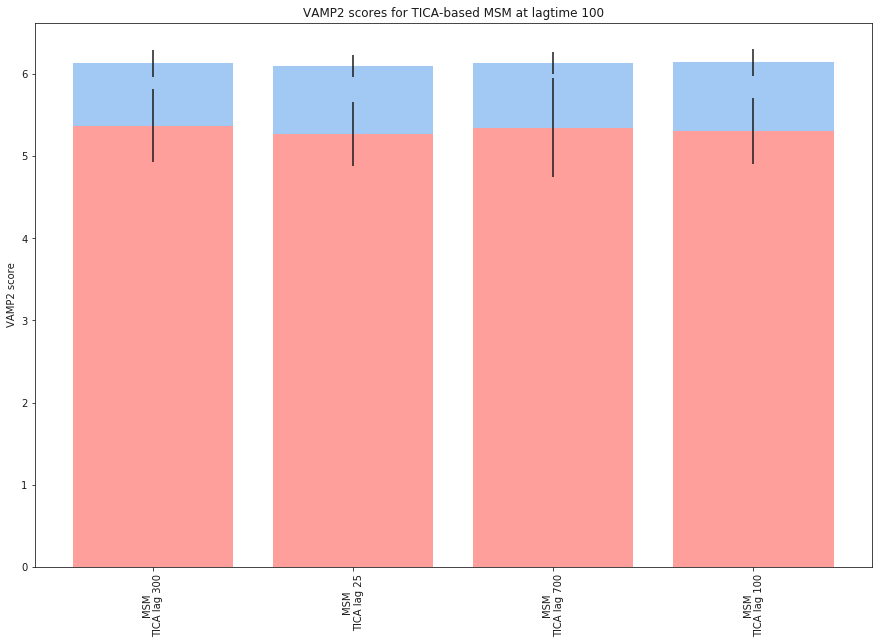

In [6]:
sns.set_color_codes('pastel')
plt.figure(figsize=(15, 10))
plt.bar(tica_labels[tica_idx], np.mean(tica_train_scores, axis=1)[tica_idx], yerr=np.std(tica_train_scores, axis=1)[tica_idx], color='b')
plt.bar(tica_labels[tica_idx], np.mean(tica_test_scores, axis=1)[tica_idx], yerr=np.std(tica_test_scores, axis=1)[tica_idx], color='r')
plt.xticks(tica_labels[tica_idx], rotation=90);
#plt.ylim([3, 6])
plt.ylabel('VAMP2 score')
plt.title('VAMP2 scores for TICA-based MSM at lagtime 100')

## HDE scores

In [13]:
hde_msm_lag = []
hde_hde_lag = []
hde_n_split = []
hde_n_dims = []
hde_labels = []
hde_n_cluster = []
hde_train_scores = []
hde_test_scores = []
hde_tica_timescales = []
hde_msm_timescales = []
hde_iter = []

In [14]:
hde_files = glob.glob('hde_msm_scores_lag_100_k_10*_iter*.pkl')

In [15]:
for file in hde_files:
    match = re.match('hde_msm_scores_lag_([0-9]+)_k_([0-9]+)_components_([0-9]+)_cluster_([0-9]+)_hlag_([0-9]+)_iter_([0-9]+).pkl', file)
    if match:
        groups = match.groups()
        hde_msm_lag.append(int(groups[0]))
        hde_n_split.append(int(groups[1]))
        hde_n_dims.append(int(groups[2]))
        hde_n_cluster.append(int(groups[3]))
        hde_hde_lag.append(int(groups[4]))
        hde_iter.append(int(groups[5]))
        
        train_scores, test_scores = pickle.load(open(file, 'rb'))
        hde_train_scores.append(train_scores)
        hde_test_scores.append(test_scores)
        hde_labels.append('SRV\n{} epochs'.format(groups[5]))

hde_msm_lag = np.array(hde_msm_lag)
hde_n_split = np.array(hde_n_split)
hde_n_dims = np.array(hde_n_dims)
hde_n_cluster = np.array(hde_n_cluster)
hde_train_scores = np.array(hde_train_scores)
hde_test_scores = np.array(hde_test_scores)
hde_labels = np.array(hde_labels)
hde_iter = np.array(hde_iter)

In [16]:
hde_idx = np.argsort(hde_iter)

Text(0.5,1,'VAMP2 scores for HDE-based MSM at lagtime 100')

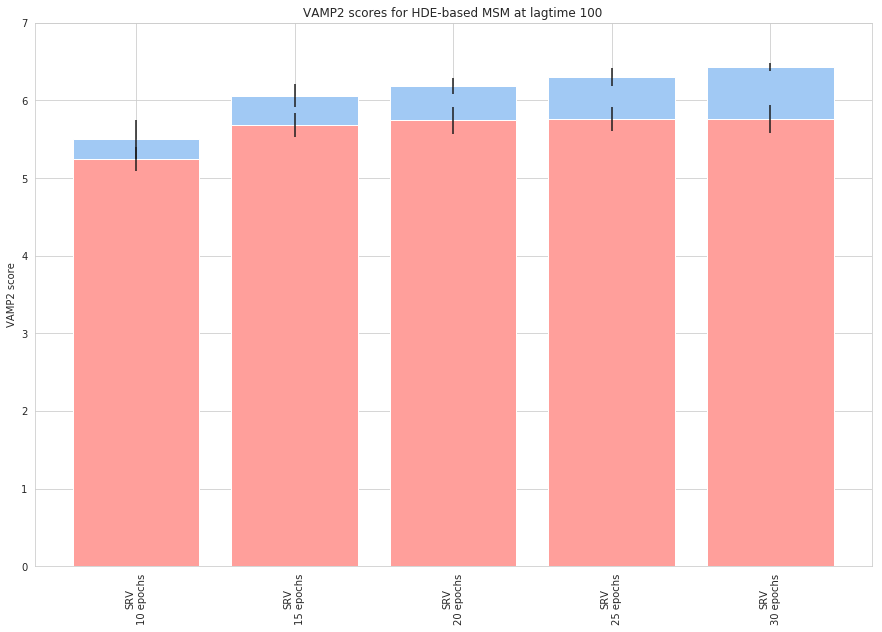

In [17]:
sns.set_color_codes('pastel')
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
plt.bar(hde_labels[hde_idx], np.mean(hde_train_scores, axis=1)[hde_idx], yerr=np.std(hde_train_scores, axis=1)[hde_idx], color='b')
plt.bar(hde_labels[hde_idx], np.mean(hde_test_scores, axis=1)[hde_idx], yerr=np.std(hde_test_scores, axis=1)[hde_idx], color='r')
plt.xticks(hde_labels[hde_idx], rotation=90);
plt.ylim([0, 7])
plt.ylabel('VAMP2 score')
plt.title('VAMP2 scores for HDE-based MSM at lagtime 100')

In [18]:
hde_test_scores
#np.mean(hde_test_scores[:,:8], axis=1)

array([[5.86690092, 5.74587011, 5.80411625, 5.69976234, 5.99019909,
        5.87650156, 5.64013863, 5.85683775, 5.30796289, 5.87298584],
       [6.04764414, 5.40710354, 5.80419254, 5.90059996, 5.82958031,
        5.74595833, 5.79436684, 5.50727367, 5.69884348, 5.70695591],
       [5.80042315, 5.7127986 , 5.68981838, 5.83091068, 5.87552118,
        5.81437874, 5.40358067, 5.91942072, 5.95384598, 5.64977074],
       [5.09445286, 5.31783676, 5.32071686, 5.3221426 , 5.04013586,
        5.26079798, 5.36236095, 5.31523991, 5.48249388, 4.96247077],
       [5.49996901, 5.90554953, 5.52511597, 5.71779537, 5.5585289 ,
        5.55769634, 5.60342884, 5.83599567, 5.9399066 , 5.67373753]])

(0, 7)

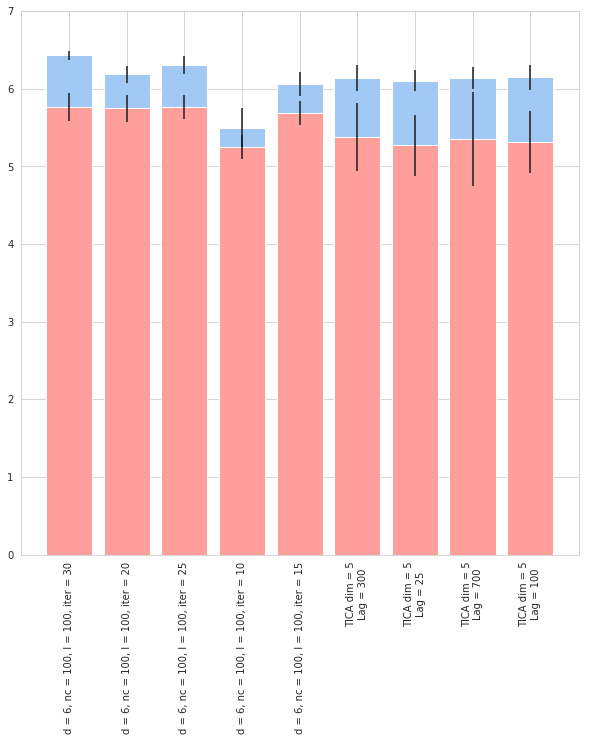

In [571]:
sns.set_color_codes('pastel')
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))

plt.bar(hde_labels, np.mean(hde_train_scores, axis=1), yerr=np.std(hde_train_scores, axis=1), color='b')
plt.bar(hde_labels, np.mean(hde_test_scores, axis=1), yerr=np.std(hde_test_scores, axis=1), color='r')


plt.bar(tica_labels, np.mean(tica_train_scores, axis=1), yerr=np.std(tica_train_scores, axis=1), color='b')
plt.bar(tica_labels, np.mean(tica_test_scores, axis=1), yerr=np.std(tica_test_scores, axis=1), color='r')

plt.xticks(np.concatenate([hde_labels, tica_labels]), rotation=90);




plt.ylim([0,7])



In [15]:
best_tica = np.mean(tica_test_scores, axis=1).argmax()

In [16]:
best_hde = np.mean(hde_test_scores, axis=1).argmax()

(3.0, 7)

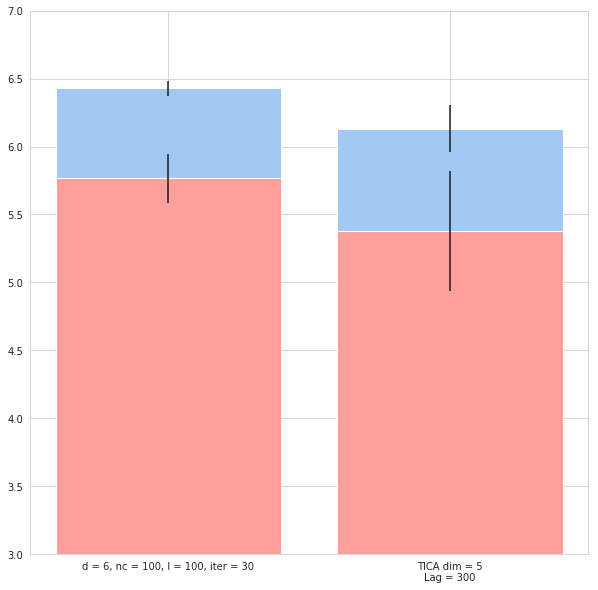

In [574]:
sns.set_color_codes('pastel')
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))

plt.bar(
    [hde_labels[best_hde], tica_labels[best_tica]], 
    [np.mean(hde_train_scores[best_hde]), np.mean(tica_train_scores[best_tica])],
    yerr=[np.std(hde_train_scores[best_hde]), np.std(tica_train_scores[best_tica])],
    color='b')

plt.bar(
    [hde_labels[best_hde], tica_labels[best_tica]], 
    [np.mean(hde_test_scores[best_hde]), np.mean(tica_test_scores[best_tica])],
    yerr=[np.std(hde_test_scores[best_hde]), np.std(tica_test_scores[best_tica])],
    color='r')

plt.ylim([3.0,7])


## Generate box plot comparing HDE to TICA-MSM VAMP2

In [19]:
p_hde_train_scores = hde_train_scores[hde_idx,:].flatten()
p_hde_test_scores = hde_test_scores[hde_idx,:].flatten()
p_hde_labels = hde_labels[hde_idx].repeat(10)
p_hde_train_test = np.array(['Train', 'Test']).repeat(p_hde_labels.shape[0])

In [20]:
df_hde = pd.DataFrame(
    data=np.concatenate([p_hde_train_scores, p_hde_test_scores]),
    columns=['Score'])
df_hde['Model'] = np.concatenate([p_hde_labels, p_hde_labels])
df_hde['Dataset'] = p_hde_train_test

In [21]:
p_tica_train_scores = tica_train_scores.flatten()
p_tica_test_scores = tica_test_scores.flatten()
p_tica_labels = tica_labels.repeat(10)
p_tica_train_test = np.array(['Train', 'Test']).repeat(p_tica_labels.shape[0])

In [22]:
df_tica = pd.DataFrame(
    data=np.concatenate([p_tica_train_scores, p_tica_test_scores]),
    columns=['Score'])
df_tica['Model'] = np.concatenate([p_tica_labels, p_tica_labels])
df_tica['Dataset'] = p_tica_train_test

In [23]:
df = pd.concat([df_hde, df_tica])

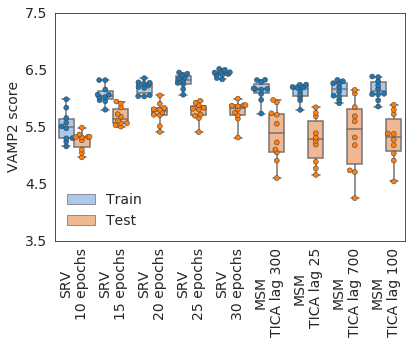

In [25]:
sns.set_style("white")
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(1, figsize=(6, 5))
sns.boxplot(x="Model", y="Score", hue="Dataset", data=df, palette="pastel", ax=ax, whis=np.inf)
sns.swarmplot(x="Model", y="Score", hue="Dataset", data=df, dodge=True, linewidth=0.5, ax=ax)


ax.set_ylim([3.5, 7.5])
ax.set_xlabel('')
ax.set_ylabel('VAMP2 score')
ax.set_yticks(np.arange(3.5, 8, 1))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], ncol=1, loc=3, frameon=False)

plt.tight_layout()
plt.savefig('hde_msm_vamp2.pdf', dpi=300)
plt.show()